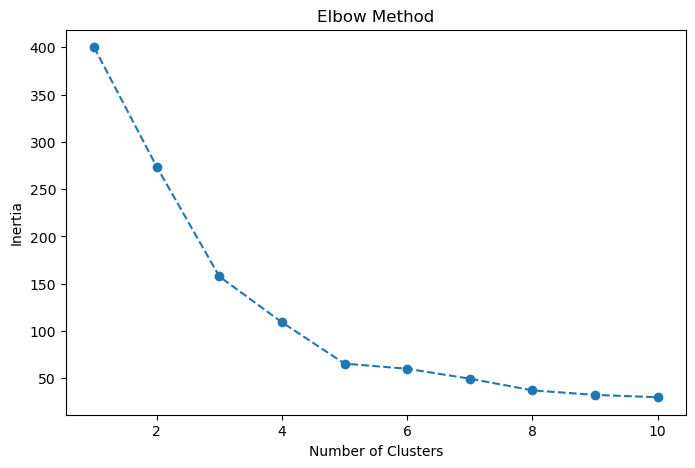

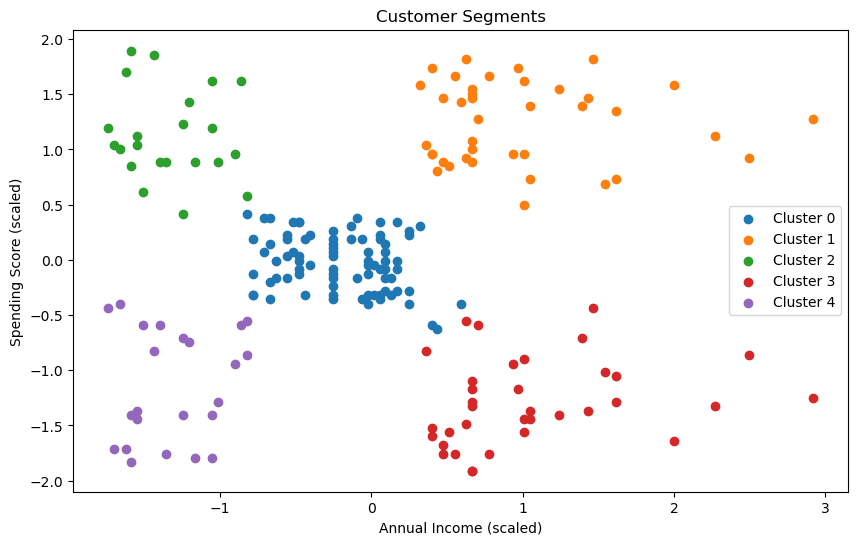

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/apput/Downloads/Mall_Customers.csv'  # Path to the dataset on the local system
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

# Extract the features for clustering
# In this case, we use 'Annual Income (k$)' and 'Spending Score (1-100)'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data for better performance of the K-means algorithm
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use the elbow method to determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# From the elbow curve, choose the optimal number of clusters (e.g., 5)
optimal_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(
        X_scaled[kmeans.labels_ == cluster, 0],
        X_scaled[kmeans.labels_ == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.show()

# Save the clustered dataset to a new CSV file
data.to_csv("Clustered_Customers.csv", index=False)
